In [85]:
#Lets first import all the nessessary libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings(action="ignore",category=FutureWarning)
warnings.filterwarnings(action="ignore",category=DeprecationWarning)

pd.pandas.set_option("display.max_rows",None)
pd.pandas.set_option("display.max_columns",None)

In [90]:
#Lets read the data in
df1=pd.read_csv ("LT_Processed_without_Outliers.csv")

In [91]:
#Lets check the head of th data
df1.head()

,NewDCFlag,ColoReady At PlanReservationStart Flag,DeploymentSeverity,EngineeringGroup,PlanResourceTypeName,IsAddRack,IsFirstFootprint,IsNPI,PlanGEO,PlanIntentName,NumberOfRacks,NumberOfServers,PlanOrderPriorityName,PlanPropertyGroupName,Region,RegionGroup,RegionType,SKU Avaliable Flag,SKUCategoryName,CT Signal to LIve,CT Signal to Dock
0,True,missing,5.0,Azure,Compute,missing,False,False,Asia Pacific,Growth,20.0,800.0,99-ZZ No Priority,Azure Compute APAC,Southeast Asia,Not Restricted,Hero,0,PreRack,124.0,31.0
1,False,missing,5.0,Azure,Storage,missing,False,False,Asia Pacific,Growth,20.0,280.0,99-ZZ No Priority,Azure Storage APAC,Southeast Asia,Not Restricted,Hero,0,PreRack,126.0,42.0
2,True,missing,5.0,Azure,Compute,missing,False,False,Europe,Growth,20.0,800.0,99-ZZ No Priority,Azure Compute EMEA,West Europe,Not Restricted,Hero,0,PreRack,198.0,31.0
3,False,missing,5.0,Azure,XIO Compute,missing,False,False,United States,Growth,20.0,880.0,99-ZZ No Priority,Azure Compute US,West US,Not Restricted,Hub,0,PreRack,207.0,49.0
4,True,missing,5.0,Azure,Compute,missing,False,False,Europe,Growth,20.0,800.0,99-ZZ No Priority,Azure Compute EMEA,North Europe,Not Restricted,Hero,0,PreRack,221.0,31.0


In [32]:
df1['IsMainstream'].value_counts() #has almost unique value so will drop it-ProjectCategory,NewRegionFlag

Not Mainstream    1122
Rare_var             2
Name: IsMainstream, dtype: int64

In [38]:
df1['RegionGroup'].value_counts()

Not Restricted    1077
Restricted          43
Rare_var             4
Name: RegionGroup, dtype: int64

In [53]:
df1['NewDCFlag'].value_counts() #has almost unique value so will drop it

False    1042
True       82
Name: NewDCFlag, dtype: int64

In [52]:
df1.drop("NewRegionFlag",axis=1,inplace=True)# So we droped- IsMainstream,ProjectCategory,NewRegionFlag

In [88]:
#Since we already dealt with EDA and Feature Engineering, we will just check the summary
#Fuction to see the summary of the data
def summary_table(df):
    print(f"Dataset Shape: {df.shape}")
    #print("Total Columns in the Dataset:", df1.columns.nunique())
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing Values'] = df.isnull().sum().values
    summary['Uniques Values'] = df.nunique().values
  
    return summary

In [92]:
summary_table(df1)

Dataset Shape: (1070, 21)


,Name,dtypes,Missing Values,Uniques Values
0,NewDCFlag,bool,0,2
1,ColoReady At PlanReservationStart Flag,object,0,3
2,DeploymentSeverity,float64,0,4
3,EngineeringGroup,object,0,10
4,PlanResourceTypeName,object,0,71
5,IsAddRack,object,0,3
6,IsFirstFootprint,bool,0,2
7,IsNPI,bool,0,2
8,PlanGEO,object,0,22
9,PlanIntentName,object,0,10


In [93]:
#Lets fix the datatypes of each feature (Convert Bool type as Object type)
bool_features_list= [feature for feature in df1.columns if df1[feature].dtype =="bool"]
bool_features_list

df1[bool_features_list] = df1[bool_features_list].astype('object')

In [94]:
categorical_features_list= [feature for feature in df1.columns if df1[feature].dtype =="object"]
aditional= ['SKU Avaliable Flag','DeploymentSeverity']
categorical_features_list=categorical_features_list+ aditional
categorical_features_list

['NewDCFlag',
 'ColoReady At PlanReservationStart Flag',
 'EngineeringGroup',
 'PlanResourceTypeName',
 'IsAddRack',
 'IsFirstFootprint',
 'IsNPI',
 'PlanGEO',
 'PlanIntentName',
 'PlanOrderPriorityName',
 'PlanPropertyGroupName',
 'Region',
 'RegionGroup',
 'RegionType',
 'SKUCategoryName',
 'SKU Avaliable Flag',
 'DeploymentSeverity']

In [ ]:
#Now Lets handle the catogorical features
#**Nominal data** --> data are not in any order --> **OneHotEncoder** is used in this case
#**Ordinal data** --> data are in order --> **LabelEncoder** is used in this case

In [95]:
df1['DeploymentSeverity'].value_counts()

4.0    597
3.0    216
5.0    205
2.0     52
Name: DeploymentSeverity, dtype: int64

In [26]:
#Expect DeploymentSeverity feature, all other are nominal. Only DeploymentSeverity is Ordinal 
#So lets use Lable encoder for DeploymentSeverity

d = {'missing':5,'high':2, 'medium':3,'low':4 }
df1["DeploymentSeverity"] = df1["DeploymentSeverity"].replace(d)

In [22]:
df1['EngineeringGroup'].value_counts()

Azure            889
Search            81
O365 Exchange     54
Xbox              38
Rare_var          32
SAP HANA          30
Name: EngineeringGroup, dtype: int64

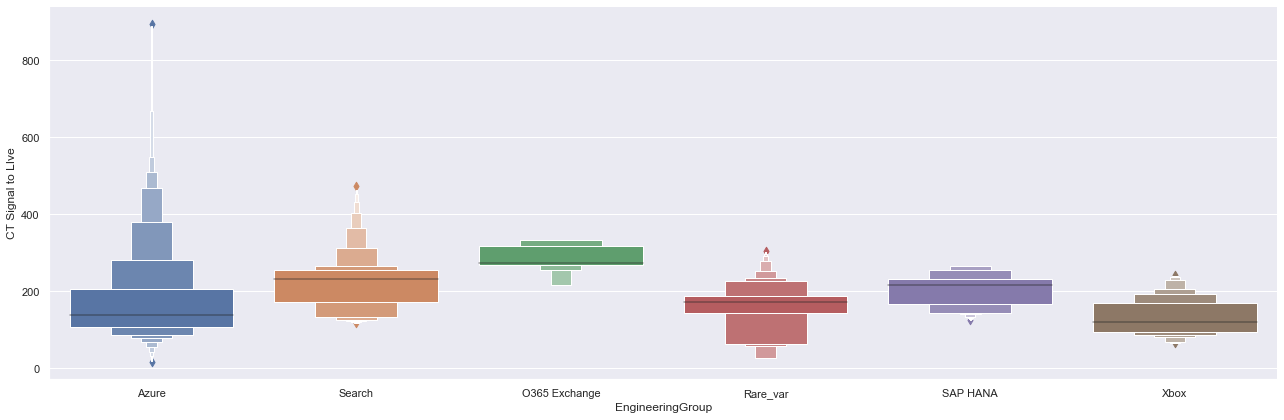

In [21]:
# CT Signal to LIve vs EngineeringGroup
sns.catplot(y = "CT Signal to LIve", x = "EngineeringGroup", data = df1.sort_values("CT Signal to LIve", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

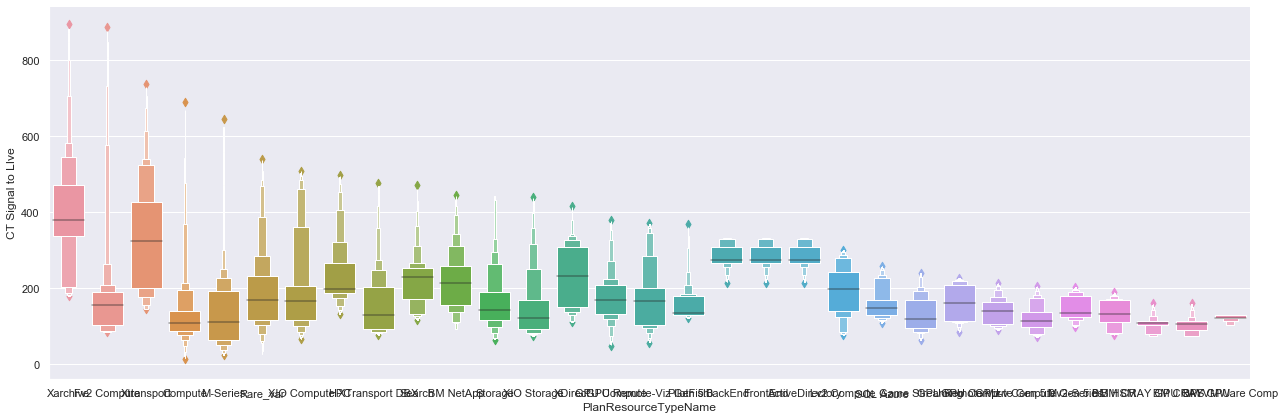

In [28]:
# PlanResourceTypeName vs EngineeringGroup
sns.catplot(y = "CT Signal to LIve", x = "PlanResourceTypeName", data = df1.sort_values("CT Signal to LIve", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [96]:
df2=df1.copy()

In [97]:
df3=pd.get_dummies(df2, drop_first=True)

In [98]:
df3.head()

,DeploymentSeverity,NumberOfRacks,NumberOfServers,SKU Avaliable Flag,CT Signal to LIve,CT Signal to Dock,NewDCFlag_True,ColoReady At PlanReservationStart Flag_Yes,ColoReady At PlanReservationStart Flag_missing,EngineeringGroup_Azure Data Lake,EngineeringGroup_Azure Key Vault,EngineeringGroup_NonWebComm,EngineeringGroup_O365 Exchange,EngineeringGroup_O365 SharePoint,EngineeringGroup_SAP HANA,EngineeringGroup_Search,EngineeringGroup_Unassigned,EngineeringGroup_Xbox,PlanResourceTypeName_AKV,PlanResourceTypeName_ActiveDirectory,PlanResourceTypeName_BM CRAY CS MT,PlanResourceTypeName_BM CRAY CSIN,PlanResourceTypeName_BM CRAY CSIN MT,PlanResourceTypeName_BM CRAY GPU,PlanResourceTypeName_BM CRAY GPU MT,PlanResourceTypeName_BM CRAY GPU OPS,PlanResourceTypeName_BM CRAY IN CORE,PlanResourceTypeName_BM CRAY MT CORE,PlanResourceTypeName_BM CRAY MT OPS,PlanResourceTypeName_BM HSM,PlanResourceTypeName_BM NetApp,PlanResourceTypeName_BM SAP LI1,PlanResourceTypeName_BM SAP MSEE,PlanResourceTypeName_BM SAP Network,PlanResourceTypeName_BM SAP Storage,PlanResourceTypeName_BM SAP VLI,PlanResourceTypeName_BM VMW CS COMP1,PlanResourceTypeName_BM VMW CS COMP2,PlanResourceTypeName_BM VMW CS MSEE,PlanResourceTypeName_BM VMWare Comp,PlanResourceTypeName_BM VMWare Comp1,PlanResourceTypeName_BackEnd,PlanResourceTypeName_Compute,PlanResourceTypeName_Compute AI-GC,PlanResourceTypeName_Compute HPC Gen 6.0,PlanResourceTypeName_Compute HPC-HB,PlanResourceTypeName_Compute-FAST,PlanResourceTypeName_Compute-SPO,PlanResourceTypeName_Confidential Compute,PlanResourceTypeName_Cosmos,PlanResourceTypeName_Dedicated Compute,PlanResourceTypeName_FPGA Compute,PlanResourceTypeName_FPGA Compute6.0,PlanResourceTypeName_FrontEnd,PlanResourceTypeName_Fv2 Compute,PlanResourceTypeName_GPU Compute,PlanResourceTypeName_GPU Compute 6.2,PlanResourceTypeName_GPU Compute Gen 5.0,PlanResourceTypeName_GPU Compute Gen 6.0,PlanResourceTypeName_GPU Machine Learning,PlanResourceTypeName_GPU Remote Viz,PlanResourceTypeName_GPU Remote-Viz Gen 5.0,PlanResourceTypeName_GPU-v Compute Gen 5.0,PlanResourceTypeName_Game Streaming,PlanResourceTypeName_Godzilla,PlanResourceTypeName_HPC,PlanResourceTypeName_HPC-HBv2,PlanResourceTypeName_Lv2 Compute,PlanResourceTypeName_M-Series,PlanResourceTypeName_Mv2-Series,PlanResourceTypeName_One IM,PlanResourceTypeName_Passport - Compute,PlanResourceTypeName_PilotFish,PlanResourceTypeName_Remote Viz Gen7,PlanResourceTypeName_SQL Azure,PlanResourceTypeName_SQL Azure (DocDB),PlanResourceTypeName_SQLDW Local Storage,PlanResourceTypeName_Search,PlanResourceTypeName_Storage,PlanResourceTypeName_StorageFast,PlanResourceTypeName_XArchive HDD,PlanResourceTypeName_XDirect,PlanResourceTypeName_XIO Compute,PlanResourceTypeName_XIO Storage,PlanResourceTypeName_XTransport DBX,PlanResourceTypeName_Xarchive,PlanResourceTypeName_Xtransport,PlanResourceTypeName_ZRS Storage,IsAddRack_Yes,IsAddRack_missing,IsFirstFootprint_True,IsNPI_True,PlanGEO_Asia Pacific,PlanGEO_Brazil,PlanGEO_CANADA,PlanGEO_CHINA,PlanGEO_Canary (US),PlanGEO_Europe,PlanGEO_FRANCE,PlanGEO_Germany,PlanGEO_Germany Gov,PlanGEO_INDIA,PlanGEO_JAPAN,PlanGEO_Korea,PlanGEO_Norway,PlanGEO_South Africa,PlanGEO_Switzerland,PlanGEO_UAE,PlanGEO_USDoD,PlanGEO_USGov,PlanGEO_United Kingdom,PlanGEO_United Kingdom (GS),PlanGEO_United States,PlanIntentName_DecommPair,PlanIntentName_Growth,PlanIntentName_Pilot,PlanIntentName_Pilot-Prod,PlanIntentName_PilotSecondary,PlanIntentName_Reservation,PlanIntentName_Secondary,PlanIntentName_Test,PlanIntentName_Test-Prod,PlanOrderPriorityName_11-H1 Top Priority Hot,PlanOrderPriorityName_20-S0 Top Priority Strategic,PlanOrderPriorityName_21-S1 Strategic Initiative,"PlanOrderPriorityName_32-WM2 Storage Mitigate (STD,XIO,ZRS)",PlanOrderPriorityName_38-WM8 Other EG Mitigate,PlanOrderPriorityName_41-C1 Customer Commit,PlanOrderPriorityName_63-N3 NPI,PlanOrderPriorityName_99-ZZ No Priority,PlanPropertyGroupName_Azure Bare Metal Cray,PlanPropertyGroupName_Azure Bare Metal NetApp,PlanPropertyGroupN

In [99]:
df3.shape

(1070, 223)

In [100]:
#lets define our predictors and outcome (Target)
x=df3.drop(["CT Signal to LIve","CT Signal to Dock"],axis=1)
y=df3["CT Signal to LIve"]

In [101]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

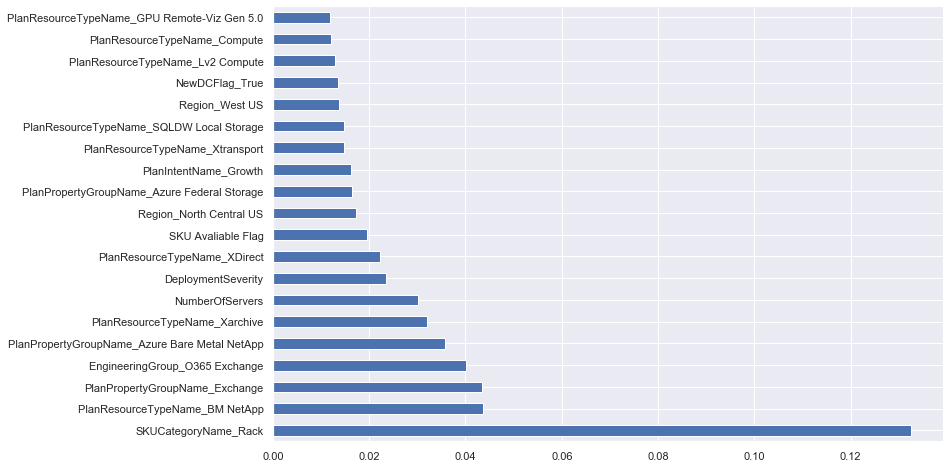

In [102]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [103]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=100)

In [104]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [105]:
rfr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [106]:
pred=rfr.predict(x_test)

In [107]:
    # Lets evaluate our results (compairing y_test with the pred)
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [108]:
#Error calculation
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r_squre= r2_score(y_test, pred)

In [109]:
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre)

RMSE : 55.80983845758567
MAE: 38.053566199376945
r_square: 0.4765567568277551


In [110]:
#Lets Check the Feaure Importance 
importances=rfr.feature_importances_

In [111]:
for feature in zip (x.columns, importances):
    print (feature)

('DeploymentSeverity', 0.08622654634379853)
('NumberOfRacks', 0.019588211714794326)
('NumberOfServers', 0.11785267879755815)
('SKU Avaliable Flag', 0.010040877312137974)
('NewDCFlag_True', 0.01869036223549817)
('ColoReady At PlanReservationStart Flag_Yes', 0.009277048686850082)
('ColoReady At PlanReservationStart Flag_missing', 0.010070017651019399)
('EngineeringGroup_Azure Data Lake', 0.00010326225135865259)
('EngineeringGroup_Azure Key Vault', 0.0008987272927054321)
('EngineeringGroup_NonWebComm', 0.0007359982476529854)
('EngineeringGroup_O365 Exchange', 0.06784839108370516)
('EngineeringGroup_O365 SharePoint', 0.0018011466788140976)
('EngineeringGroup_SAP HANA', 0.0010748209414245566)
('EngineeringGroup_Search', 0.008013527010056648)
('EngineeringGroup_Unassigned', 0.0003808805787947391)
('EngineeringGroup_Xbox', 0.0030761482336715855)
('PlanResourceTypeName_AKV', 0.000620368266751861)
('PlanResourceTypeName_ActiveDirectory', 0.0003052535130656096)
('PlanResourceTypeName_BM CRAY CS 

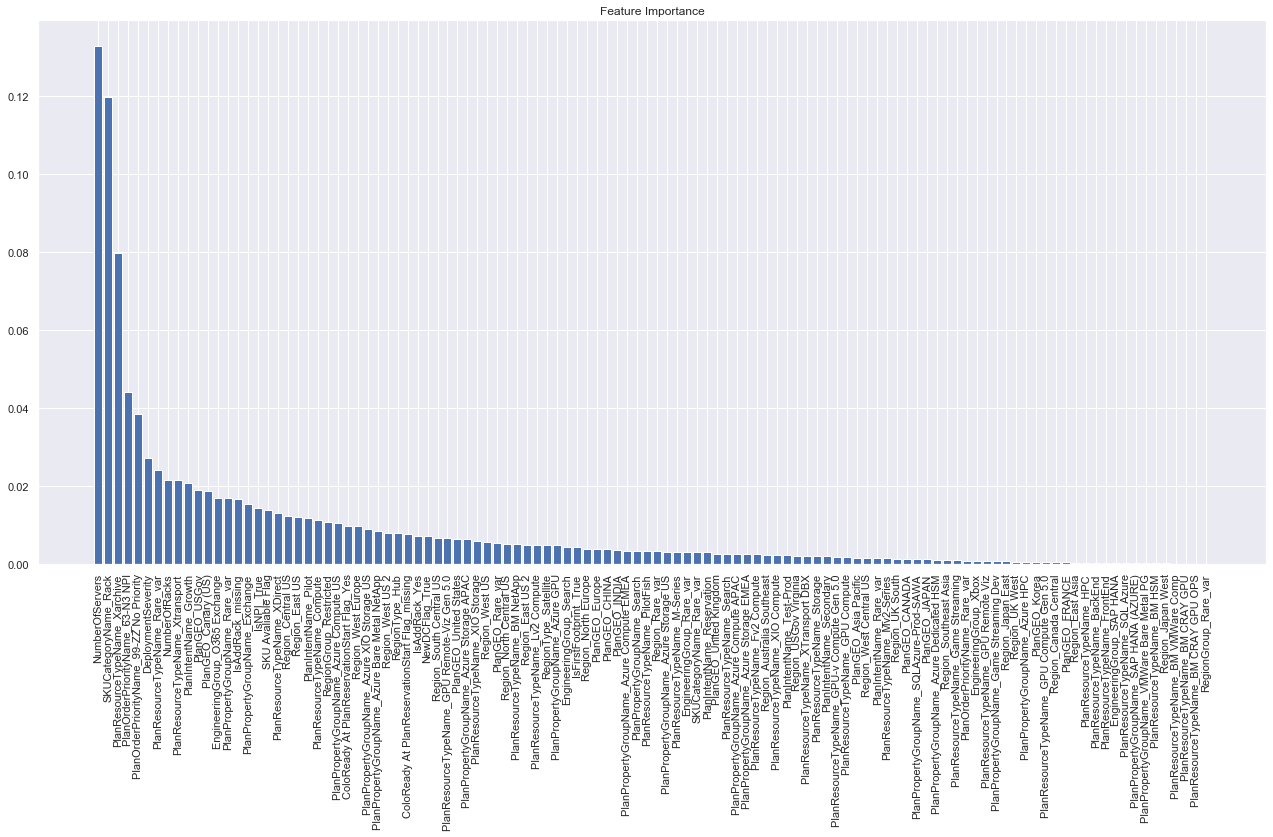

In [84]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [x.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(22,10))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(x.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(x.shape[1]), names, rotation=90)

# Show plot
plt.show()